Necessary libraries are imported

In [15]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

Required training and test data is obtained from CIFAR

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Displaying the obtained data for reference and understanding

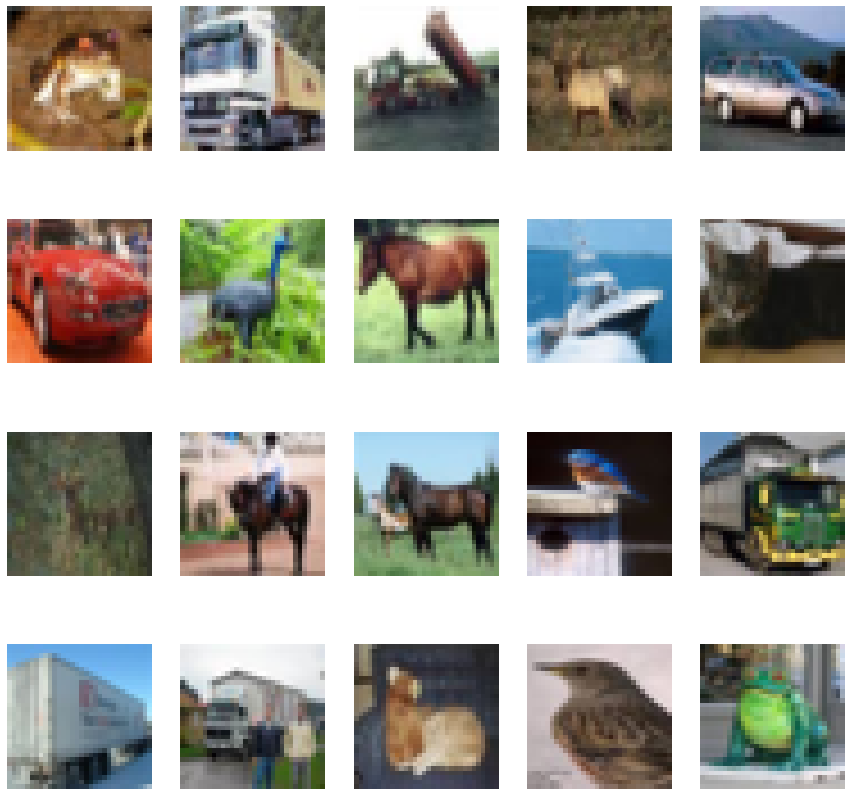

In [103]:
fig, axs = plt.subplots(4, 5, figsize=(15, 15))
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')

Preprocessing the data for convinient handling

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_test /= 255
x_train /= 255

Hot-enconding the obtained output training and test data

In [25]:
from keras.utils import np_utils

n_of_classes = len(set(y_train.flat))

Y_train = np_utils.to_categorical(y_train, n_of_classes)
Y_test = np_utils.to_categorical(y_test, n_of_classes)

Models are formed and layers are added in a sequential manner

In [28]:
# Necessary libraries are imported
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model is initiated and layers are there by added
model = Sequential()
input_shape = x_train.shape[1:]

model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))


Compiling and making the model to take the training values (Fitting the data)

In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=Y_train, validation_data=(x_test, Y_test), batch_size=100, epochs=3)

Epoch 1/3
500/500 [==============================] - 454s 906ms/step - loss: 0.5264 - accuracy: 0.8154 - val_loss: 0.6779 - val_accuracy: 0.7677
Epoch 2/3
500/500 [==============================] - 458s 916ms/step - loss: 0.5046 - accuracy: 0.8226 - val_loss: 0.6476 - val_accuracy: 0.7825
Epoch 3/3
500/500 [==============================] - 450s 901ms/step - loss: 0.4788 - accuracy: 0.8326 - val_loss: 0.6566 - val_accuracy: 0.7803


Predicting the input image

1/1 [==============================] - 0s 87ms/step


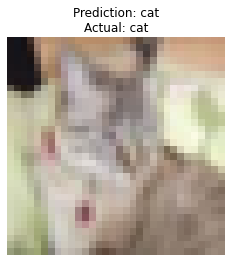

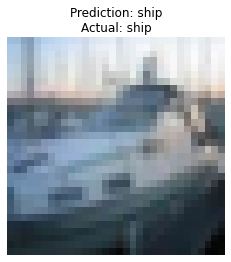

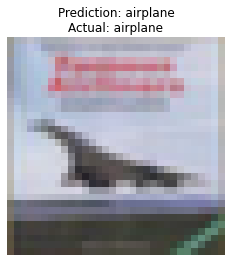

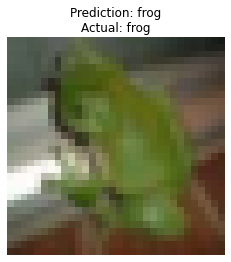

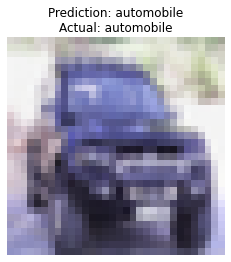

In [106]:
indexes = np.arange(0, 10)
names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

obj_dict = dict(zip(indexes, names))

start, end = 0, 10

images_batch = x_test[start:end]
actual_labels = np.argmax(Y_test[start:end], axis=-1)

# Model predicts the data
predictions = model.predict(images_batch, verbose=1)
results = np.argmax(predictions, axis=-1)

# Zipping up the linked data with a common list key
linked_result = dict(zip(results, images_batch))
linked_output_data = dict(zip(results, actual_labels))

# Displaying and comparing the predictions and genuine outputs
for key, img in linked_result.items():
  plt.imshow(img)
  title = f"Prediction: {obj_dict[key]}\nActual: {obj_dict[linked_output_data[key]]}"
  plt.title(title)
  plt.axis('off')
  plt.show()